## Import Libraries


In [1]:
import tweepy
from tweepy import OAuthHandler
from pandas import DataFrame
import re
import en_core_web_sm
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import numpy  as np
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
import folium
from branca.element import Figure
from wordcloud  import WordCloud
from sklearn.impute import SimpleImputer
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
consumer_key = 'eYGCrNK6HpLboZcAAs90dpHtZ'
consumer_secret = '3jDHM4MOzHWUkgp121enUYw43rfV6G8jug1q5iK6TZysNLl0Tx'
 
access_token = '919488389073850368-Ch4yQirIxRh0owm8URs9TH9eKq1HUPg'
access_secret = 'Eri7eAo5CfExrUtmVUdo6HjY18duoyE5h2Pywy35Lo63O'
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth,wait_on_rate_limit=True)

In [3]:
userID = "NEWS"
tweets = api.user_timeline(screen_name=userID,count=200,include_rts = False,tweet_mode = 'extended')                          

In [4]:
for info in tweets[:2]:
     print("ID: {}".format(info.id),' ',info.created_at,' ',info.full_text)


ID: 1338770862196060161   2020-12-15 09:00:21   Bis zu 16-Stunden-Tage, 6 Tage die Woche. Gewerkschaft alarmiert 😟
https://t.co/8BFgyxsUt5
ID: 1338575262850670592   2020-12-14 20:03:06   Bundesheerhunde riechen Covid-19 - https://t.co/Vn93gKQU7v


In [5]:
all_tweets = []
all_tweets.extend(tweets)
oldest_id = tweets[-1].id
while True:
    tweets = api.user_timeline(screen_name=userID,count=200,include_rts = False,tweet_mode = 'extended')                       
    if len(tweets) == 0:
        break
    oldest_id = tweets[-1].id
    all_tweets.extend(tweets)
    print('N of tweets downloaded till now {}'.format(len(all_tweets)))

N of tweets downloaded till now 400
N of tweets downloaded till now 600
N of tweets downloaded till now 800
N of tweets downloaded till now 1000
N of tweets downloaded till now 1200
N of tweets downloaded till now 1400
N of tweets downloaded till now 1600
N of tweets downloaded till now 1800
N of tweets downloaded till now 2000
N of tweets downloaded till now 2200
N of tweets downloaded till now 2400
N of tweets downloaded till now 2600
N of tweets downloaded till now 2800
N of tweets downloaded till now 3000
N of tweets downloaded till now 3200
N of tweets downloaded till now 3400
N of tweets downloaded till now 3600
N of tweets downloaded till now 3800
N of tweets downloaded till now 4000
N of tweets downloaded till now 4200
N of tweets downloaded till now 4400
N of tweets downloaded till now 4600
N of tweets downloaded till now 4800
N of tweets downloaded till now 5000
N of tweets downloaded till now 5200
N of tweets downloaded till now 5400
N of tweets downloaded till now 5600
N of

N of tweets downloaded till now 43800
N of tweets downloaded till now 44000
N of tweets downloaded till now 44200
N of tweets downloaded till now 44400
N of tweets downloaded till now 44600
N of tweets downloaded till now 44800
N of tweets downloaded till now 45000
N of tweets downloaded till now 45200
N of tweets downloaded till now 45400
N of tweets downloaded till now 45600
N of tweets downloaded till now 45800
N of tweets downloaded till now 46000
N of tweets downloaded till now 46200
N of tweets downloaded till now 46400
N of tweets downloaded till now 46600
N of tweets downloaded till now 46800
N of tweets downloaded till now 47000
N of tweets downloaded till now 47200
N of tweets downloaded till now 47400
N of tweets downloaded till now 47600
N of tweets downloaded till now 47800
N of tweets downloaded till now 48000
N of tweets downloaded till now 48200
N of tweets downloaded till now 48400
N of tweets downloaded till now 48600
N of tweets downloaded till now 48800
N of tweets 

N of tweets downloaded till now 87000
N of tweets downloaded till now 87200
N of tweets downloaded till now 87400
N of tweets downloaded till now 87600
N of tweets downloaded till now 87800
N of tweets downloaded till now 88000
N of tweets downloaded till now 88200
N of tweets downloaded till now 88400
N of tweets downloaded till now 88600
N of tweets downloaded till now 88800
N of tweets downloaded till now 89000
N of tweets downloaded till now 89200
N of tweets downloaded till now 89400
N of tweets downloaded till now 89600
N of tweets downloaded till now 89800
N of tweets downloaded till now 90000
N of tweets downloaded till now 90200
N of tweets downloaded till now 90400
N of tweets downloaded till now 90600
N of tweets downloaded till now 90800
N of tweets downloaded till now 91000
N of tweets downloaded till now 91200
N of tweets downloaded till now 91400
N of tweets downloaded till now 91600
N of tweets downloaded till now 91800
N of tweets downloaded till now 92000
N of tweets 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\contrib\pyopenssl.py", line 297, in recv_into
    return self.connection.recv_into(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\OpenSSL\SSL.py", line 1822, in recv_into
    self._raise_ssl_error(self._ssl, result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\OpenSSL\SSL.py", line 1622, in _raise_ssl_error
    raise WantReadError()
OpenSSL.SSL.WantReadError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\contrib\pyopenssl.py", line 297, in recv_into
    return self.connection.recv_into(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\OpenSSL\SSL.py", line 1822, in recv_into
    self._raise_ssl_error(self._ssl, result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\OpenSSL\SSL.py", line 1639, in _raise_ssl_error
    raise SysCallE

TypeError: can only concatenate str (not "list") to str

In [6]:
outtweets = [[tweet.id_str, 
              tweet.created_at, 
              tweet.user.screen_name, 
              tweet.full_text.encode("utf-8").decode("utf-8")] 
             for idx,tweet in enumerate(all_tweets)]


In [7]:
df = DataFrame(outtweets,columns=["id","created_at","screen_name", "text"])
df.to_csv('Dataset/%s_tweets.csv' % userID,index=False)
df.head(3)

,id,created_at,screen_name,text
0,1338770862196060161,2020-12-15 09:00:21,NEWS,"Bis zu 16-Stunden-Tage, 6 Tage die Woche. Gewe..."
1,1338575262850670592,2020-12-14 20:03:06,NEWS,Bundesheerhunde riechen Covid-19 - https://t.c...
2,1338554862649434113,2020-12-14 18:42:03,NEWS,Die bewegendsten Schlager-Momente 2020 - https...


In [32]:
df = pd.read_csv('Dataset/Trump_tweets.csv')
df.head()

,id,created_at,screen_name,text
0,1336712163914899456,2020-12-09 16:39:49,Trump,Our Christmas tree at @TrumpDC is bringing a n...
1,1334584272074760192,2020-12-03 19:44:20,Trump,Unwind by an inviting fire and discover a weal...
2,1333815184108957696,2020-12-01 16:48:15,Trump,Last chance to take advantage of the Suitest D...
3,1333480717217636352,2020-11-30 18:39:12,Trump,Bring the World of Trump home with you this Ch...
4,1331991068234100739,2020-11-26 15:59:52,Trump,Today we give thanks with grateful hearts. Hap...


In [15]:
df.drop_duplicates()

,id,created_at,screen_name,text
0,1338770862196060161,2020-12-15 09:00:21,NEWS,"Bis zu 16-Stunden-Tage, 6 Tage die Woche. Gewe..."
1,1338575262850670592,2020-12-14 20:03:06,NEWS,Bundesheerhunde riechen Covid-19 - https://t.c...
2,1338554862649434113,2020-12-14 18:42:03,NEWS,Die bewegendsten Schlager-Momente 2020 - https...
3,1338517886973997058,2020-12-14 16:15:07,NEWS,So bleiben die Kekse zur Adventzeit länger fri...
4,1338493219181649927,2020-12-14 14:37:06,NEWS,"14. Dezember: Merry Christmas, Honey! - https:..."
...,...,...,...,...
196,1323979584212291586,2020-11-04 13:25:05,NEWS,Harte Zeiten für die Türkis-Grüne Regierung ht...
197,1323950670047809537,2020-11-04 11:30:12,NEWS,"Was wirklich hinter ""Schleich di, du Oaschloch..."
198,1323923886036164610,2020-11-04 09:43:46,NEWS,"Beamter über Einsatz: ""Haben Verletzte geborge..."
199,1323862938084646912,2020-11-04 05:41:35,NEWS,Das Rennen in den USA wird extrem knapp. Die b...


In [14]:
print(len(df))

201


# Preprocessing
## Tweets Cleaning

lemmatization, tokenizing, removing stopwards, punctuations, hashtags and mentions



remove hashtags and mentions

In [33]:
def clean_tweet(df, text_tweets):
    df[text_tweets] = df[text_tweets].str.lower()
    df[text_tweets] = df[text_tweets].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

clean_tweets = clean_tweet(df, 'text')
clean_tweets.head()

,id,created_at,screen_name,text
0,1336712163914899456,2020-12-09 16:39:49,Trump,our christmas tree at is bringing a new level...
1,1334584272074760192,2020-12-03 19:44:20,Trump,unwind by an inviting fire and discover a weal...
2,1333815184108957696,2020-12-01 16:48:15,Trump,last chance to take advantage of the suitest d...
3,1333480717217636352,2020-11-30 18:39:12,Trump,bring the world of trump home with you this ch...
4,1331991068234100739,2020-11-26 15:59:52,Trump,today we give thanks with grateful hearts happ...


In [34]:
dfclean=clean_tweets.to_csv('Dataset/tweetscleaned.csv')

In [37]:
df = pd.read_csv('Dataset/tweetscleaned.csv').drop(df.columns[0], axis='columns')
df.head()

,id,created_at,screen_name,text
0,1336712163914899456,2020-12-09 16:39:49,Trump,our christmas tree at is bringing a new level...
1,1334584272074760192,2020-12-03 19:44:20,Trump,unwind by an inviting fire and discover a weal...
2,1333815184108957696,2020-12-01 16:48:15,Trump,last chance to take advantage of the suitest d...
3,1333480717217636352,2020-11-30 18:39:12,Trump,bring the world of trump home with you this ch...
4,1331991068234100739,2020-11-26 15:59:52,Trump,today we give thanks with grateful hearts happ...


remove stopwords, punctuations, lemmatize and tokenize word

In [38]:
nlp = en_core_web_sm.load()
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation) 
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()

In [39]:
def furnished(text):
    final_text = []
    for i in w_tokenizer.tokenize(text):
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)


In [40]:
df.text = df.text.apply(furnished)
df.sample(5)

,id,created_at,screen_name,text
1097,1278737520075866115,2020-07-02 17:09:17,Trump,hailed golfing legend greatest golf course wor...
2606,1253438208584503299,2020-04-23 21:38:51,Trump,looking improve golf game home introducing vir...
2583,1283474296145350659,2020-07-15 18:51:32,Trump,today celebrate albemarle estate breathtaking ...
2716,1301224842268729352,2020-09-02 18:25:52,Trump,splendor elegance style await forbes travel gu...
68,1261374051349491712,2020-05-15 19:13:03,Trump,cant wait welcome back awardwinning hotel acro...


In [26]:
print(len(df))

127200


## Élimination des dédoublements

In [16]:
df=df.drop_duplicates()

In [17]:
print(len(df))

201


#### Vectorizing the tweets


In [41]:
tv=TfidfVectorizer()
tfidf_tweets =tv.fit_transform(df.text)

In [42]:
tf_idf = pd.DataFrame(data = tfidf_tweets.toarray(), columns=tv.get_feature_names())

In [43]:
final_df = tf_idf

In [44]:
final_df.shape[0]

3874

In [45]:
final_df.T.nlargest(5, 0)

,0,1,2,3,4,5,6,7,8,9,...,3864,3865,3866,3867,3868,3869,3870,3871,3872,3873
bringing,0.452301,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
level,0.401172,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pennsylvania,0.401172,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tree,0.370913,0.0,0.0,0.0,0.0,0.0,0.298712,0.0,0.222512,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
avenue,0.332574,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cluster tweets

In [46]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [47]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))

In [48]:
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) 
        y_lower = y_upper + 10  
    plt.show()


In [49]:
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) 
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

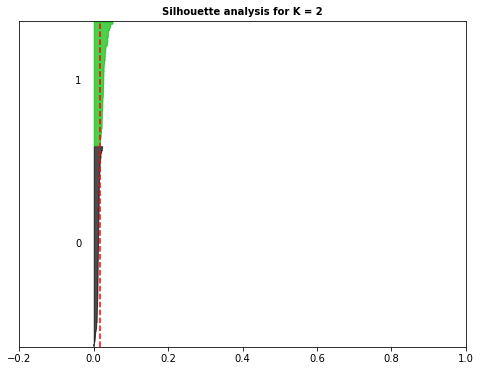

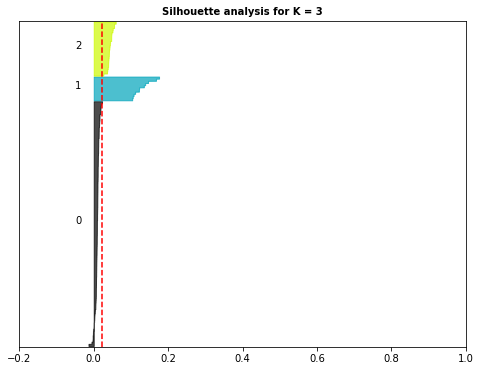

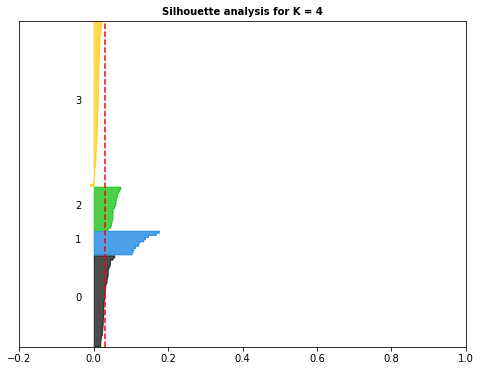

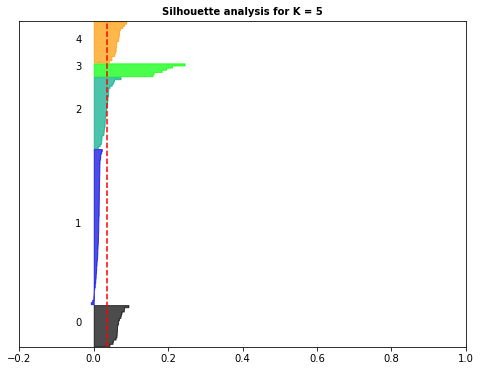

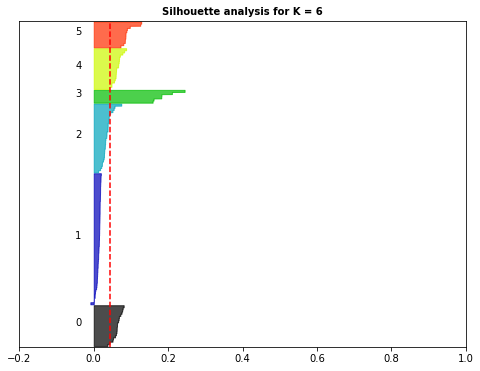

In [50]:
k=6
kmeans_results  = run_KMeans(k, final_df)
silhouette(kmeans_results, final_df, plot=True)

## Top features

In [37]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) 
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) 
        sorted_means = np.argsort(x_means)[::-1][:n_feats] 
        features = tv.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

In [38]:
def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

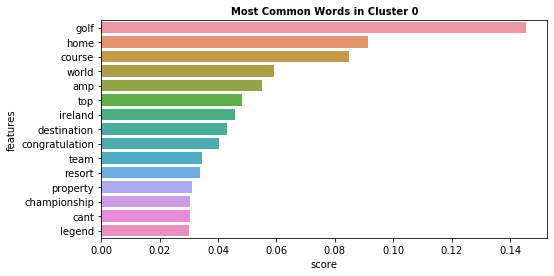

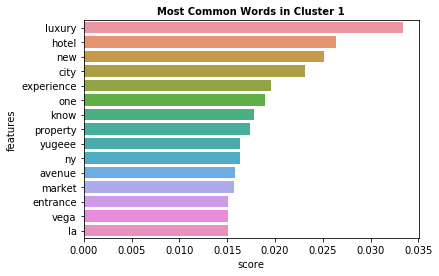

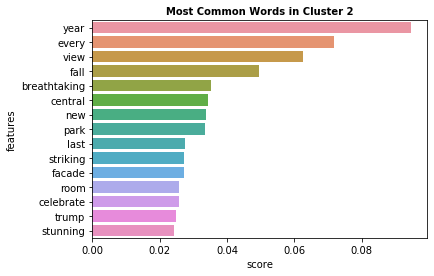

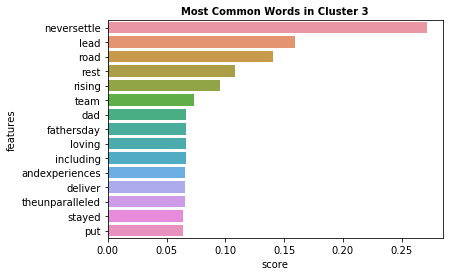

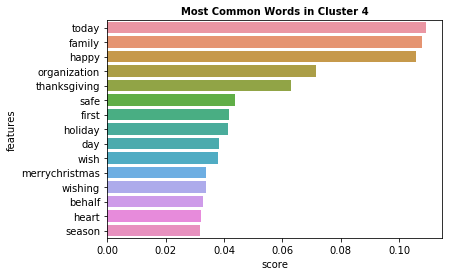

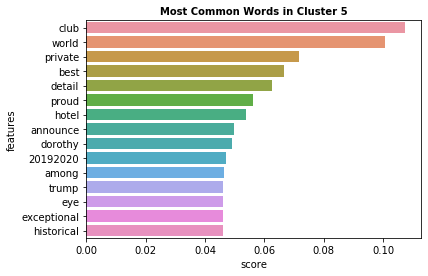

In [57]:
best_result = 6
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 15)

In [40]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

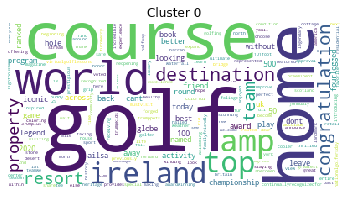

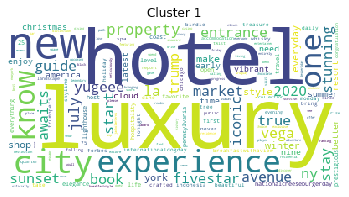

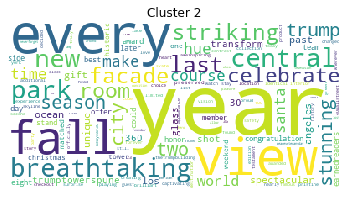

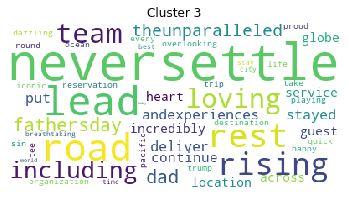

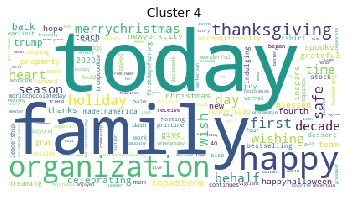

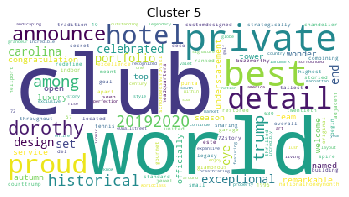

In [41]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)